In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans,MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.preprocessing import normalize
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
# 2014
df = pd.read_csv('/Users/admin/Documents/results.csv', error_bad_lines=False)

In [3]:
df.shape

(31984, 21)

In [4]:
pd.set_option('display.max_columns', 21)
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [6]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [8]:
df['state'].isnull().sum()

2576

In [9]:
# encode women as '1'
df['gender'] = np.where(df['gender']=='F', 1,0)

In [10]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,0,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,1,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,0,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,1,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,0,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [11]:
# we will select only some features for clustering
df = df[['pace', '5k', 'half', '40k', 'age', 'gender' ]]

In [12]:
#make age a binary feature
df['age'] = np.where(df['age'] >= df['age'].median(), 1, 0)

In [13]:
# we will remove entries that contain '-'

df = df[df['5k'] != '-']
df = df[df['half'] != '-']
df = df[df['40k'] != '-']

In [14]:
# fill nans with the most frequent values
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [15]:
# make sure it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31849 entries, 0 to 31983
Data columns (total 6 columns):
pace      31849 non-null float64
5k        31849 non-null object
half      31849 non-null object
40k       31849 non-null object
age       31849 non-null int64
gender    31849 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ MB


In [16]:
# convert features to numeric data type

df['5k'] = pd.to_numeric(df['5k'])
df['half'] = pd.to_numeric(df['half'])
df['40k'] = pd.to_numeric(df['40k'])

In [17]:
# check the data types
df.dtypes

pace      float64
5k        float64
half      float64
40k       float64
age         int64
gender      int64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31849 entries, 0 to 31983
Data columns (total 6 columns):
pace      31849 non-null float64
5k        31849 non-null float64
half      31849 non-null float64
40k       31849 non-null float64
age       31849 non-null int64
gender    31849 non-null int64
dtypes: float64(4), int64(2)
memory usage: 1.7 MB


In [19]:
# Train-test split
X_train, X_test = train_test_split(
    df,
    test_size=0.3,
    random_state=42)

In [20]:
X_train.shape

(22294, 6)

In [21]:
X_train.head()

,pace,5k,half,40k,age,gender
31621,10.43,28.78,129.40,258.82,0,0
10408,9.42,24.48,102.62,209.70,1,0
16337,8.23,21.23,96.38,203.73,0,0
25391,10.95,29.05,122.42,267.48,1,0
19638,8.33,25.65,107.77,206.57,1,1


In [22]:
# save the column names
columns = X_train.columns

In [23]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l1')

#normalize only non-binary features
X_train_norm = normalizer.fit_transform(X_train.iloc[:, :4])
X_test_norm = normalizer.transform(X_test.iloc[:, :4])

In [24]:
numerical_X_train = pd.DataFrame(X_train_norm)

In [25]:
X_train = X_train.reset_index(drop=True)

In [26]:
#creating a normalized train set (with binary features left binary)
X_train_concat = pd.concat([numerical_X_train, 
                            X_train['age'], 
                            X_train['gender']], 
                            axis=1, 
                            join='outer', 
                            join_axes=None, 
                            ignore_index=False,
                            keys=None, 
                            levels=None, 
                            names=None, 
                            verify_integrity=False,
                            copy=True)

In [27]:
X_train_concat.columns = columns

In [28]:
X_train_concat.head(3)

,pace,5k,half,40k,age,gender
0,0.024402,0.067333,0.302740,0.605526,0,0
1,0.027208,0.070706,0.296401,0.605684,1,0
2,0.024972,0.064417,0.292442,0.618169,0,0


In [29]:
X_train_concat.shape

(22294, 6)

In [30]:
X_test = X_test.reset_index(drop=True)

In [31]:
numerical_X_test = pd.DataFrame(X_test_norm)

In [32]:
numerical_X_test.head()

,0,1,2,3
0,0.024404,0.073557,0.300939,0.601101
1,0.024052,0.073484,0.307289,0.595176
2,0.024834,0.069547,0.292538,0.613082
3,0.024438,0.068487,0.302043,0.605032
4,0.024442,0.071984,0.302075,0.601499


In [33]:
X_test_concat = pd.concat([numerical_X_test, 
                           X_test['age'],
                           X_test['gender']], 
                           axis=1, 
                           join='outer', 
                           join_axes=None, 
                           ignore_index=False,
                           keys=None, 
                           levels=None, 
                           names=None, 
                           verify_integrity=False,
                           copy=True)

In [34]:
X_test.head()

,pace,5k,half,40k,age,gender
0,8.47,25.53,104.45,208.63,1,0
1,6.88,21.02,87.90,170.25,1,0
2,8.22,23.02,96.83,202.93,1,0
3,9.82,27.52,121.37,243.12,1,1
4,8.02,23.62,99.12,197.37,1,0


In [35]:
X_test_concat.columns = columns

In [36]:
X_test_concat.head()

,pace,5k,half,40k,age,gender
0,0.024404,0.073557,0.300939,0.601101,1,0
1,0.024052,0.073484,0.307289,0.595176,1,0
2,0.024834,0.069547,0.292538,0.613082,1,0
3,0.024438,0.068487,0.302043,0.605032,1,1
4,0.024442,0.071984,0.302075,0.601499,1,0


In [37]:
X_train = X_train.reset_index(drop=True)

In [38]:
X_train_concat.isnull().sum()

pace      0
5k        0
half      0
40k       0
age       0
gender    0
dtype: int64

In [39]:
X_test_concat.isnull().sum()

pace      0
5k        0
half      0
40k       0
age       0
gender    0
dtype: int64

In [40]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [41]:
X_test_pca = pca.transform(X_test)

# Mean Shift

In [42]:
n_clusters = []
for sample in [X_train_concat, X_test_concat]:
    bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=500)
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs = -1)
    model.fit(sample)
    labels = model.labels_ #model.predict(test_set)
    n_clusters_ = len(np.unique(labels))
    n_clusters.append(n_clusters_)
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.9811212395036689
0.9811226166505512


In [43]:
# the number of clusters stays consistent
n_clusters

[4, 4]

In [44]:
clusters = [2, 3, 4, 5, 7]
for number in clusters:
    minibatchkmeans = MiniBatchKMeans(init='k-means++',
                        n_clusters=number, 
                        random_state=42, 
                        batch_size=200).fit(X_train_concat)
    labels = minibatchkmeans.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X_train_concat, labels, metric='euclidean'))

Estimated number of clusters: 2
0.5896100867407617
Estimated number of clusters: 3
0.7535495645078545
Estimated number of clusters: 4
0.9811212395036689
Estimated number of clusters: 5
0.851478810941485
Estimated number of clusters: 7
0.6622999295381692


In [45]:
clusters = [2, 3, 4, 5, 7]
for number in clusters:
    minibatchkmeans = MiniBatchKMeans(init='k-means++',
                        n_clusters=number, 
                        random_state=42, 
                        batch_size=200).fit(X_test_concat)
    labels = minibatchkmeans.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X_test_concat, labels, metric='euclidean'))

Estimated number of clusters: 2
0.593263096502797
Estimated number of clusters: 3
0.7488590058367617
Estimated number of clusters: 4
0.9811226166505512
Estimated number of clusters: 5
0.9016827348309309
Estimated number of clusters: 7
0.656649416851998


`MiniBatchKmeans stays stable with 2 and 4 clusters.`

# Spectral Clustering

In [46]:
clusters = [2, 3, 4, 5, 7]
for number in clusters:
    sc = SpectralClustering(n_clusters=number, n_jobs = -1)
    sc.fit(X_train_concat)
    labels = sc.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X_train_concat, labels, metric='euclidean'))

Estimated number of clusters: 2
0.5396148971126723
Estimated number of clusters: 3
0.7633959021911844
Estimated number of clusters: 4
0.9811212395036689
Estimated number of clusters: 5
0.8067288414208086
Estimated number of clusters: 7
0.6151663868925603


In [47]:
clusters = [2, 3, 4, 5, 7, 8]
for number in clusters:
    sc = SpectralClustering(n_clusters=number, n_jobs = -1)
    sc.fit(X_test_concat)
    labels = sc.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X_test_concat, labels, metric='euclidean'))

Estimated number of clusters: 2
0.5413343488404189
Estimated number of clusters: 3
0.7645089681037301
Estimated number of clusters: 4
0.9811226166505512
Estimated number of clusters: 5
0.8322105850282216
Estimated number of clusters: 7
0.639828640526801
Estimated number of clusters: 8
0.5826188908531402


`Spectral clustering stays stable with 2, 4, and 5 clusters.`

In [48]:
sc = SpectralClustering(n_clusters=2, n_jobs = -1)
sc.fit(X_train_concat)
sc_labels = sc.labels_

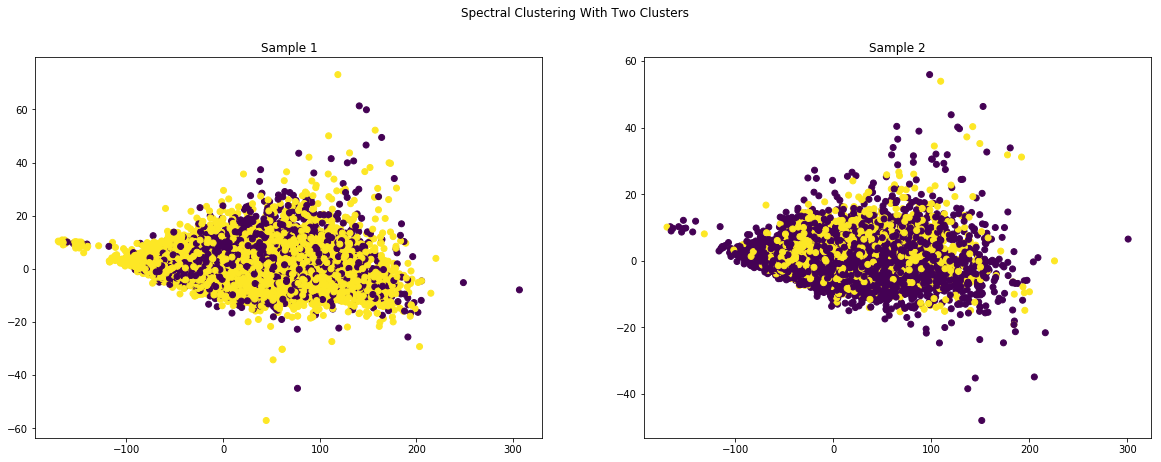

In [49]:
plt.figure(figsize=(20,7))

plt.subplot(121)
sc = SpectralClustering(n_clusters=2, n_jobs = -1)
sc.fit(X_train_concat)
sc_labels = sc.labels_
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=sc_labels)
plt.title('Sample 1')

plt.subplot(122)
sc.fit(X_test_concat)
sc_2labels = sc.labels_
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=sc_2labels)
plt.title('Sample 2')


plt.suptitle('Spectral Clustering With Two Clusters')
plt.show()

In [50]:
minibatchkmeans = MiniBatchKMeans(init='k-means++',
                        n_clusters=2, 
                        random_state=42, 
                        batch_size=200)

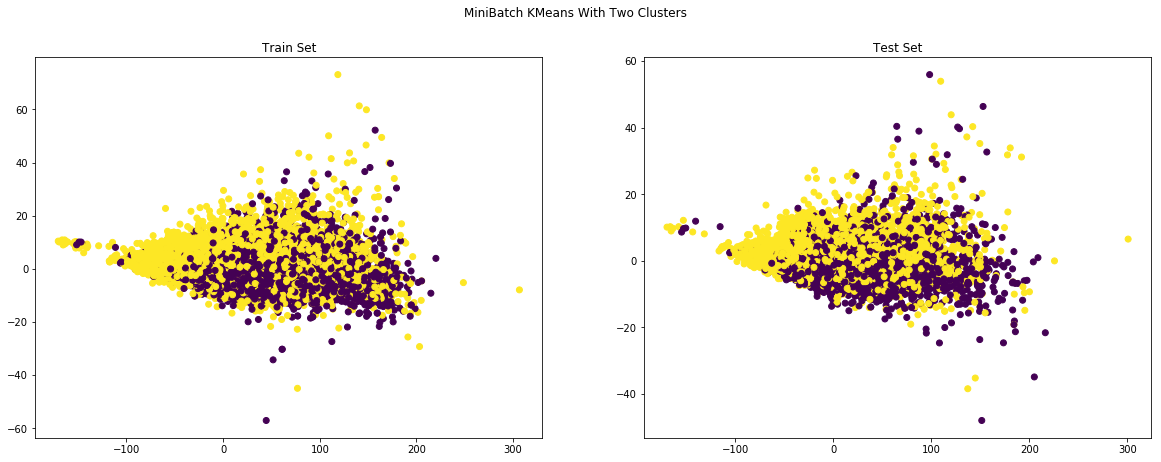

In [51]:
plt.figure(figsize=(20,7))

plt.subplot(121)

minibatchkmeans.fit_predict(X_train_concat)
mini_labels = minibatchkmeans.labels_
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=mini_labels)
plt.title('Train Set')

plt.subplot(122)
labels = minibatchkmeans.predict(X_test_concat)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=labels)
plt.title('Test Set')


plt.suptitle('MiniBatch KMeans With Two Clusters')
plt.show()

# Centroids Location

First cluster is comprised of participants who are more likely to be older, female or in a wheelchair. They overall took almost twice as much time to reach each milestone. The second cluster is comprised of people who are more likely to be younger, male,and less likely to be disabled. They are twice as fast on average.

In [52]:
pd.DataFrame(minibatchkmeans.cluster_centers_, columns = columns)

,pace,5k,half,40k,age,gender
0,0.024546,0.068942,0.299049,0.607463,0.444424,1.0
1,0.024669,0.069297,0.297535,0.608499,0.601188,0.0


In [53]:
kmeans_four = MiniBatchKMeans(init='k-means++',
                        n_clusters=5, 
                        random_state=42, 
                        batch_size=200)

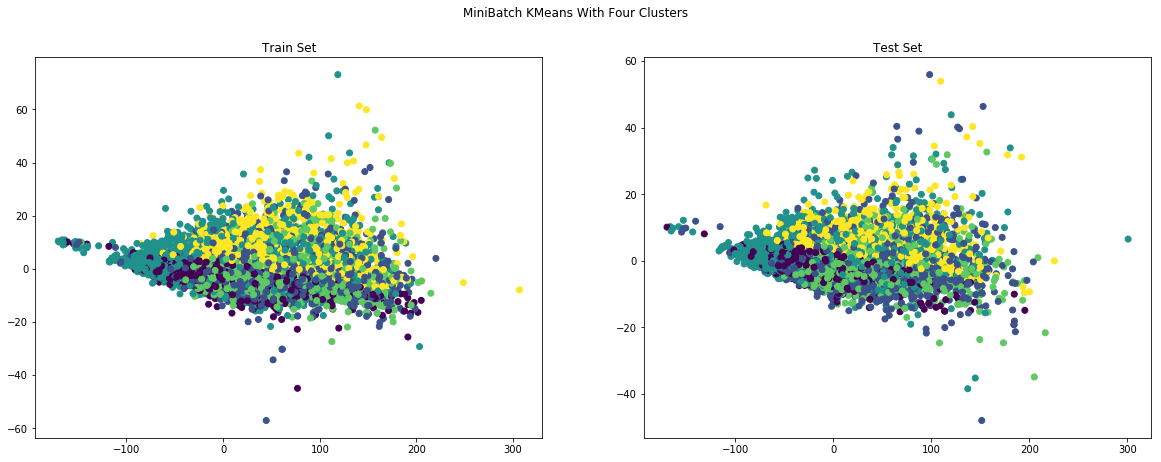

In [54]:
plt.figure(figsize=(20,7))

plt.subplot(121)

kmeans_four.fit_predict(X_train_concat)
mini_labels = kmeans_four.labels_
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=mini_labels)
plt.title('Train Set')

plt.subplot(122)
labels = kmeans_four.predict(X_test_concat)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=labels)
plt.title('Test Set')


plt.suptitle('MiniBatch KMeans With Four Clusters')
plt.show()

In [55]:
pd.DataFrame(kmeans_four.cluster_centers_, columns = columns)

,pace,5k,half,40k,age,gender
0,0.024407,0.070787,0.302289,0.602516,1.0,0.0
1,0.024554,0.068848,0.298678,0.607920,0.0,1.0
2,0.024586,0.069918,0.298507,0.606989,0.0,0.0
3,0.024576,0.068606,0.298836,0.607982,1.0,1.0
4,0.025535,0.063935,0.283138,0.627392,1.0,0.0


# Further Examination of The Clusters

In [56]:
X_train['labels'] = mini_labels

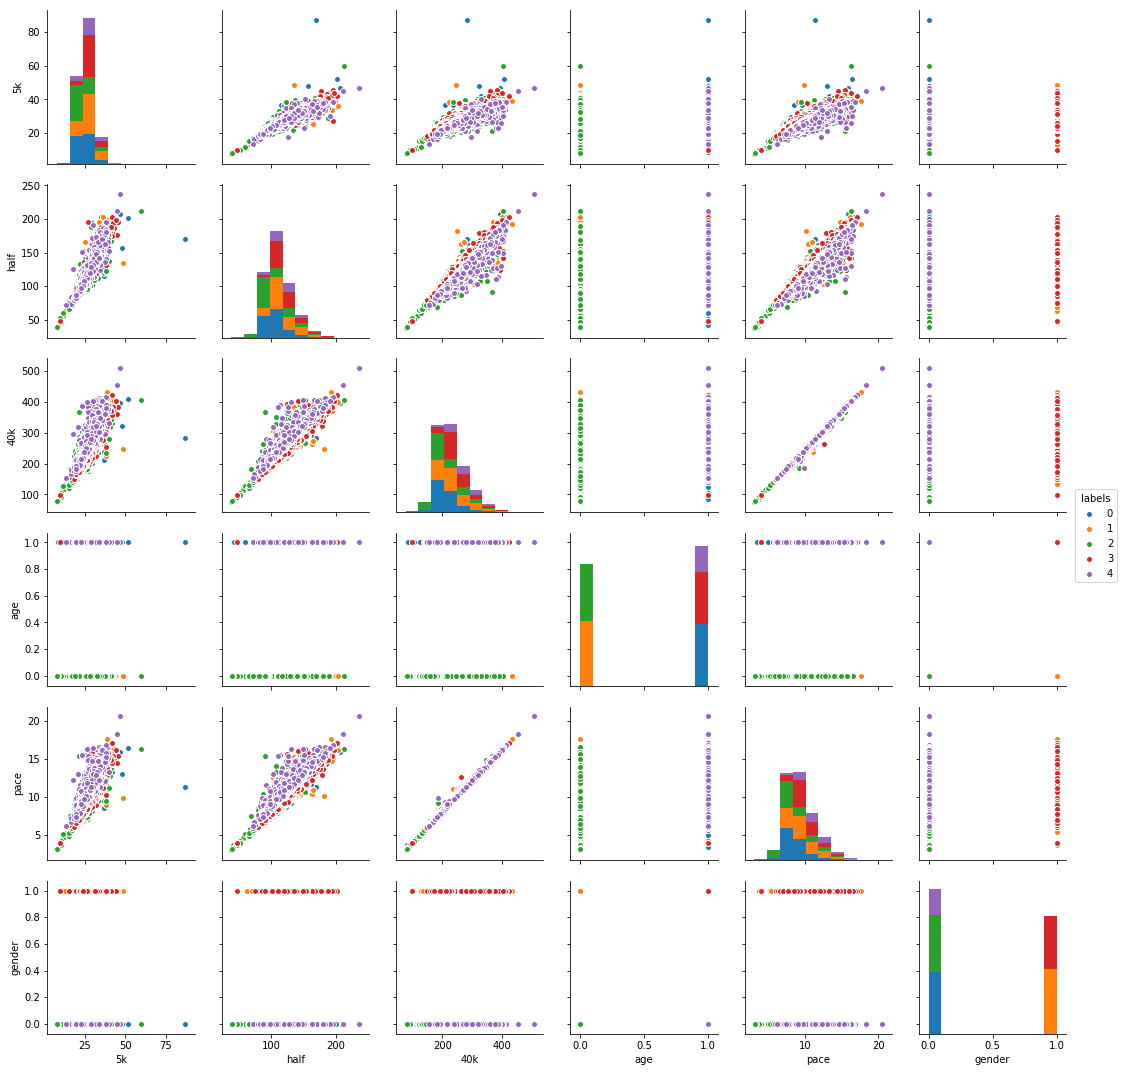

In [57]:
g = sns.pairplot(X_train, vars = ['5k', 'half', '40k', 'age', 'pace','gender'], hue='labels')

In [58]:
zero = X_train[X_train['labels']==0]
four = X_train[X_train['labels']==4]

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


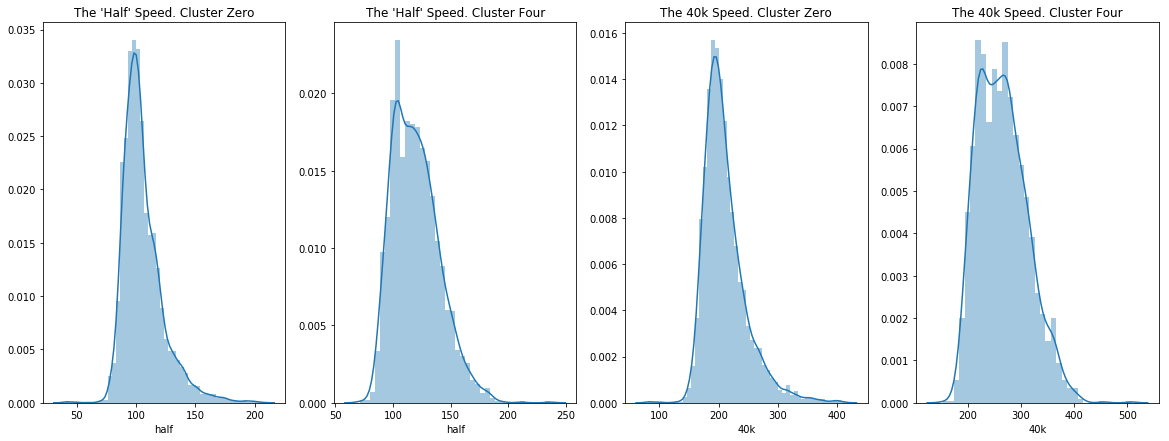

In [66]:
plt.figure(figsize=(20, 7))

plt.subplot(141)
sns.distplot(zero['half'])
plt.title('The \'Half\' Speed. Cluster Zero')

plt.subplot(142)
sns.distplot(four['half'])
plt.title('The \'Half\' Speed. Cluster Four')

plt.subplot(143)
sns.distplot(zero['40k'])
plt.title('The 40k Speed. Cluster Zero')

plt.subplot(144)
sns.distplot(four['40k'])
plt.title('The 40k Speed. Cluster Four')

plt.show()

# Summary

Clustering algorithms give two stable solutions for the marathon data.

`Two cluster solution divides the data into two groups (MiniBatch K-Means):` 
The main difference appears to be gender.

`Five cluster solution provides the following sub-divisions (MiniBatch K-Means):`
- Men above median age who were faster than than the men in cluster four
- Younger women
- Younger men
- Women above median age
- Men above median age who were slower than the men in cluster zero